# **Porter Delivery time estimation**

* Porter is India’s largest marketplace for intra-city logistics and a leader in the country’s $40 billion intra-city logistics market. The company aims to enhance the lives of over 150,000+ driver-partners by offering them consistent earnings and independence. To date, Porter has served more than 5 million customers.

* Porter works with a wide range of restaurants to deliver their items directly to the people.

## **Problem Statement**


* Porter has several delivery partners available to deliver food from various restaurants and aims to provide customers with an estimated delivery time based on their orders, the restaurant location, and the delivery partners involved.

* This dataset contains the necessary information to train a regression model that can estimate delivery times based on these features., based on all those features

## **Data Dictionary**

* **market_id** : integer id for the market where the restaurant lies

* **created_at** : the timestamp at which the order was placed

* **actual_delivery_time** : the timestamp when the order was delivered

* **store_primary_category** : category for the restaurant

* **order_protocol** : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, prebooked, third part etc)

* **total_items subtotal** : final price of the order

* **num_distinct_items** : the number of distinct items in the order

* **min_item_price** : price of the cheapest item in the order

* **max_item_price** : price of the costliest item in order

* **total_onshift_partners** : number of delivery partners on duty at the time the order was placed

* **total_busy_partners** : number of delivery partners attending to other tasks

* **total_outstanding_orders** : total number of orders to be fulfilled at the moment

* **estimated_store_to_consumer_driving_duration** : approximate travel time from restaurant to customer



### Steps taken:

*   load the data and understand the features
*   feature engineering creating target variable(time taken for each order)
*   cleaning the data and visualization
*   preparing the data for training
*   random forest regression
*   neural network regression
*   comparison of both ways





In [1]:
!pip install tensorflow

In [56]:
#for reding and handling the data
import pandas as pd
import numpy as np
import os

#for visualizing and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#Ann training
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError


from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [44]:
df=pd.read_csv('data_2.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


Printing the information and head of the data to get an understanding of it.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

# Data preprocessing

## Feature engineering
* We have the timestamps for when the order was placed and when it was delivered. We will create a new column to represent the time taken for delivery, which will serve as our target column.
*  The time taken for delivery will be calculated by subtracting the order timestamp from the delivery timestamp.


* The times we need to work with, specifically `created_at` and `actual_delivery_time`, are currently in object format.
* We need to convert them to datetime format for easier manipulation. The Pandas datetime function verifies whether the data is in the correct format, understands the order of the data, and converts it accordingly.

In [46]:
df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [47]:
#We are creating a new feature to estimate the delivery time by subtracting the created_at timestamp from the actual_delivery_time.
df['time_taken']=df['actual_delivery_time']-df['created_at']
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype          
---  ------                                        --------------   -----          
 0   market_id                                     175777 non-null  float64        
 1   created_at                                    175777 non-null  datetime64[ns] 
 2   actual_delivery_time                          175777 non-null  datetime64[ns] 
 3   store_primary_category                        175777 non-null  int64          
 4   order_protocol                                175777 non-null  float64        
 5   total_items                                   175777 non-null  int64          
 6   subtotal                                      175777 non-null  int64          
 7   num_distinct_items                            175777 non-null  int64          
 8   min_item_price                              

* Now that we have the delivery time, we can convert it to minutes, which will serve as our target variable for training the models. 

* The `timedelta` is a data type that stores time differences, and it’s more effective to convert it to a float. Converting to minutes accomplishes this as well.

In [50]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0


* We can also extract the hour when the order was placed and the day of the week it was delivered.

In [51]:
df['hour'] = df['created_at'].dt.hour

df['day'] = df['created_at'].dt.dayofweek

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,0 days 00:46:00,46.0,2,1


* Since we have created new columns for delivery time in minutes, hours, and days, we are dropping the columns that are no longer required.

In [52]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

Checking null values in the data

In [53]:
df.isna().sum()

market_id                                       0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
time_taken_mins                                 0
hour                                            0
day                                             0
dtype: int64

### Plotting correlation to get an idea of the data

<Axes: >

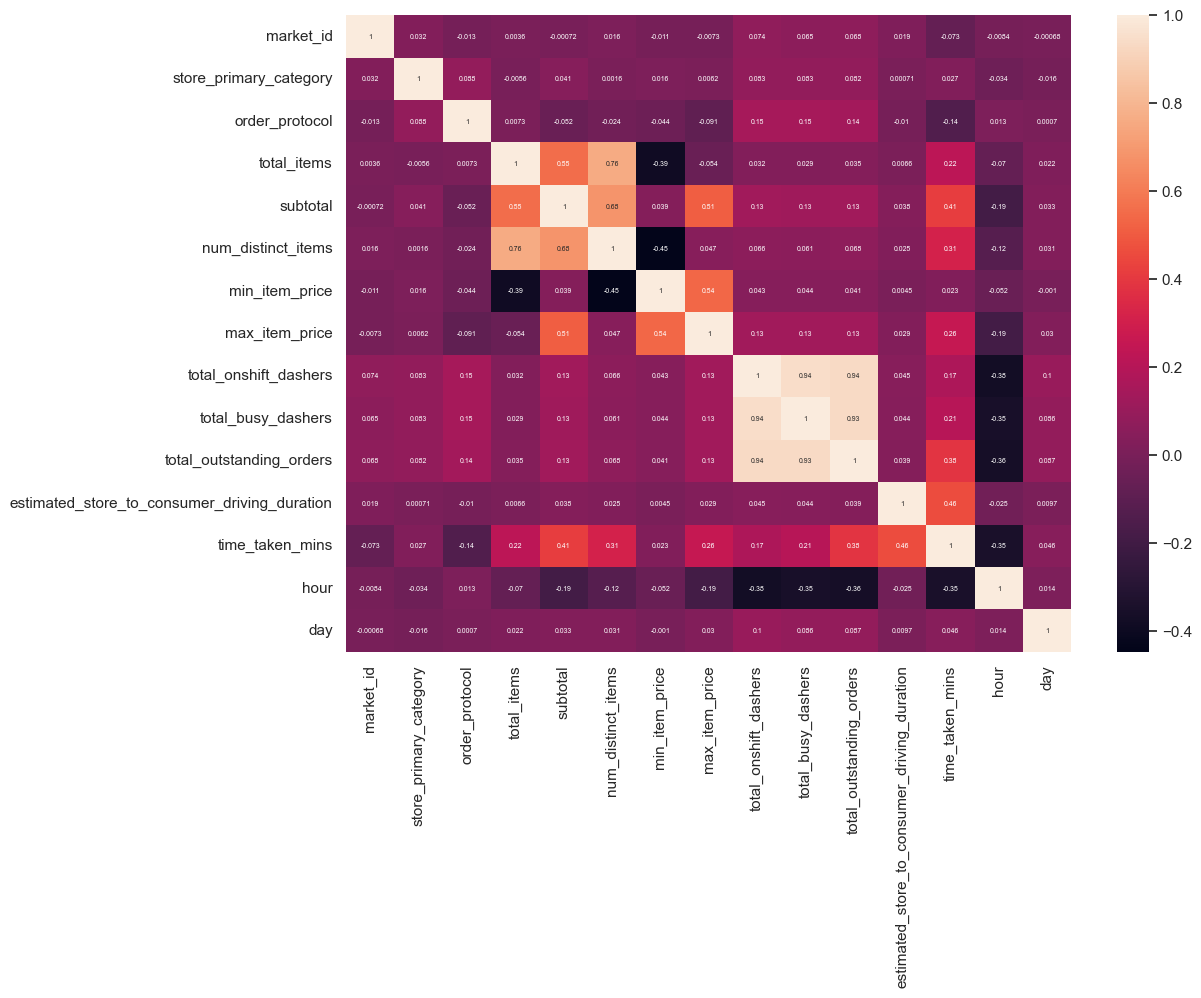

In [13]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 5})

**We have one categorical column (store_primary_category) that we will convert to an integer for model imputation.**

In [54]:
df['store_primary_category'] = df['store_primary_category'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int8   
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

## Data visualization and cleaning

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

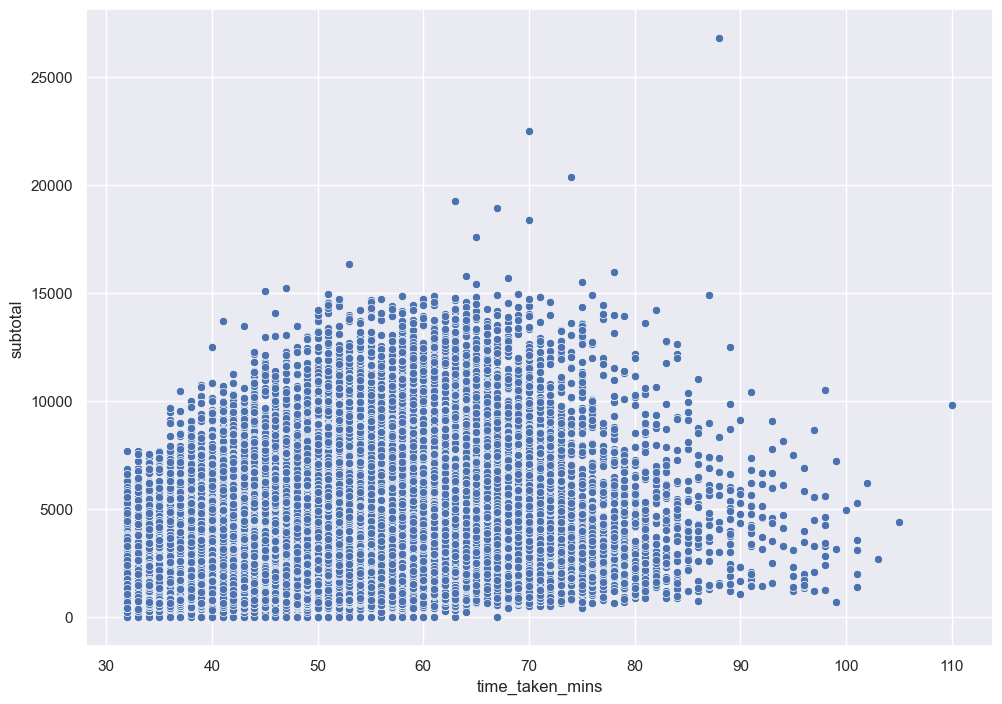

In [15]:
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

<Axes: xlabel='total_items', ylabel='subtotal'>

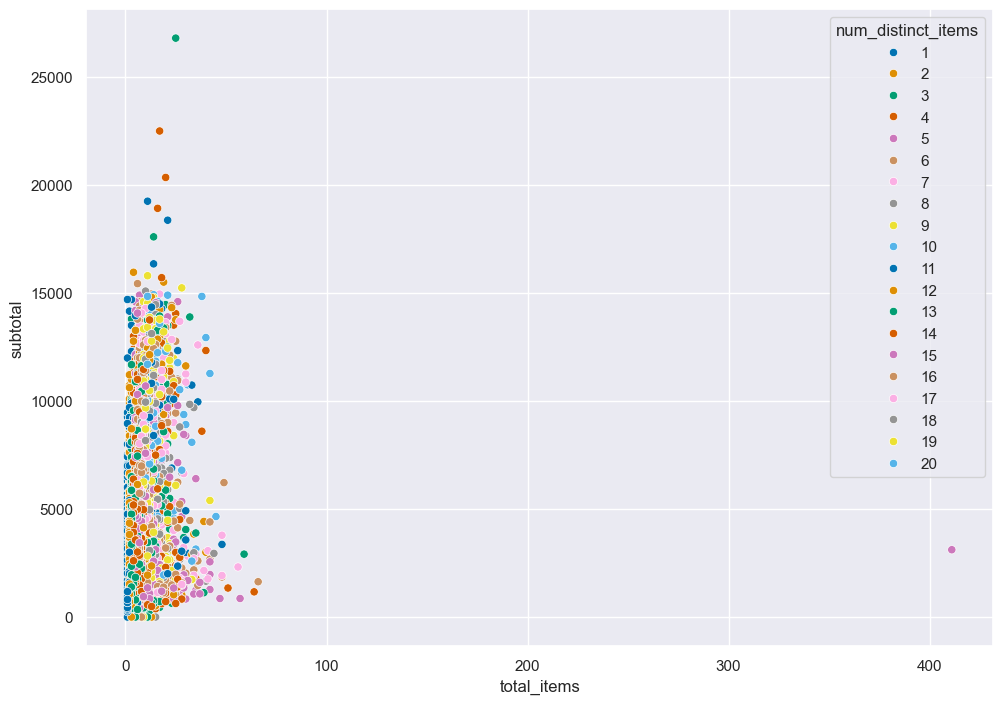

In [16]:
sns.scatterplot(x='total_items', y='subtotal', hue='num_distinct_items',palette='colorblind', data=df)

In [55]:
#here we are checking about any outliers
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1 = LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score'] = model1.fit_predict(df)


In [18]:
print("number of outliers : ",(len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)] # Removing the outliers


number of outliers :  831


* We identified 831 outliers, and since removing them won’t impact model accuracy, we decided to drop them.

In [19]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int8   
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            174946 

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

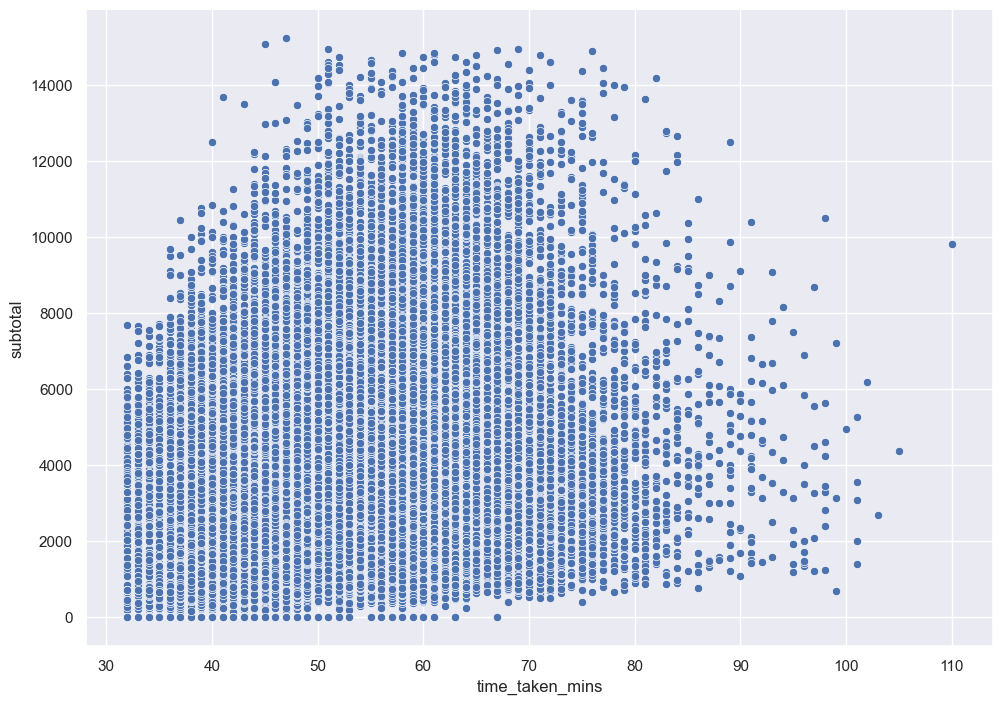

In [20]:
sns.scatterplot(x='time_taken_mins', y='subtotal', data=df)

**We can see that after removing outliers our data is looking better**

In [21]:
# number of orders placed in a day per week
counts = df['day'].value_counts()
print(counts)

day
5    30678
6    29768
4    24895
0    24068
3    22504
2    21659
1    21374
Name: count, dtype: int64


* Orders are notably highest on Saturday, followed by Sunday and Friday.

<Axes: xlabel='hour', ylabel='time_taken_mins'>

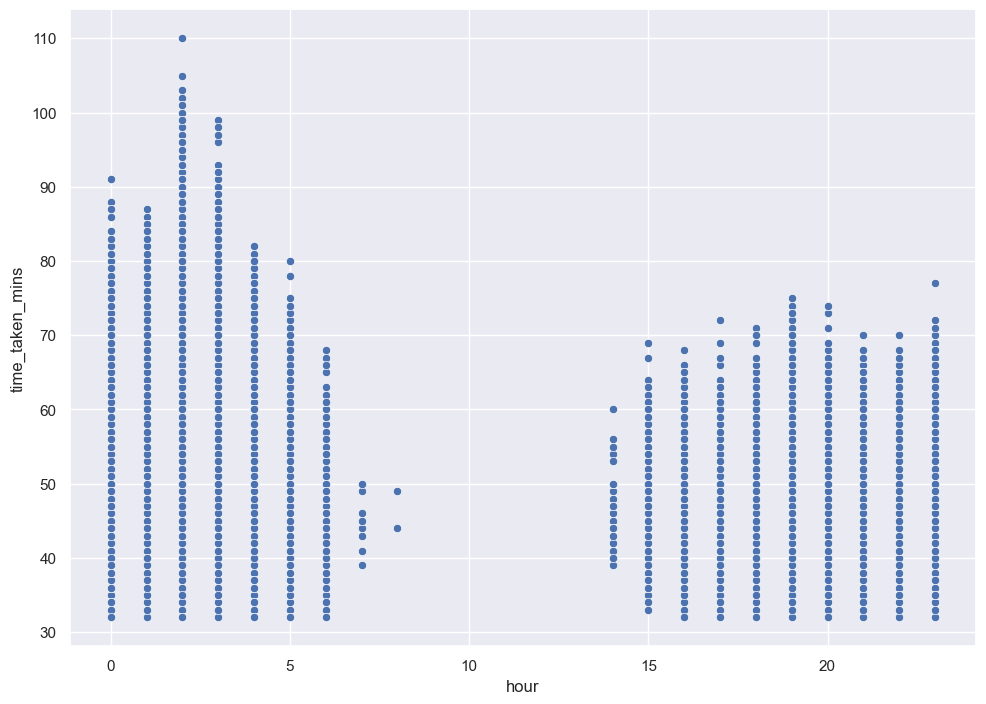

In [22]:
sns.scatterplot(x='hour',y='time_taken_mins', data=df)

## Data Spliting and modeling

In [23]:
y=df['time_taken_mins'] # Target
x = df.drop(['time_taken_mins'], axis=1) # Features
df.drop(['time_taken_mins'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

* We are dividing the data into an 80% training set and a 20% test set.
* We have use the random_state to consistently generate the same data values.

In [24]:
x.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,21,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,3,3
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,2,1


## **Random forest**

* We are using a random forest regressor to compare with NN(Neural Network) regression.

In [25]:
regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)
mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

mse :  3.248664935695913
rmse :  1.8024053194816956
mae: 1.2912829379822806


In [27]:
r2_score(y_test, prediction)

0.9622425619204379

In [28]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [29]:
print("mape : ",MAPE(y_test, prediction))

mape :  2.780708696608117


* We are visualizing the most important features according to the Random Forest regressor, sorted from most to least important.

Text(0.5, 0, 'Random Forest Feature Importance')

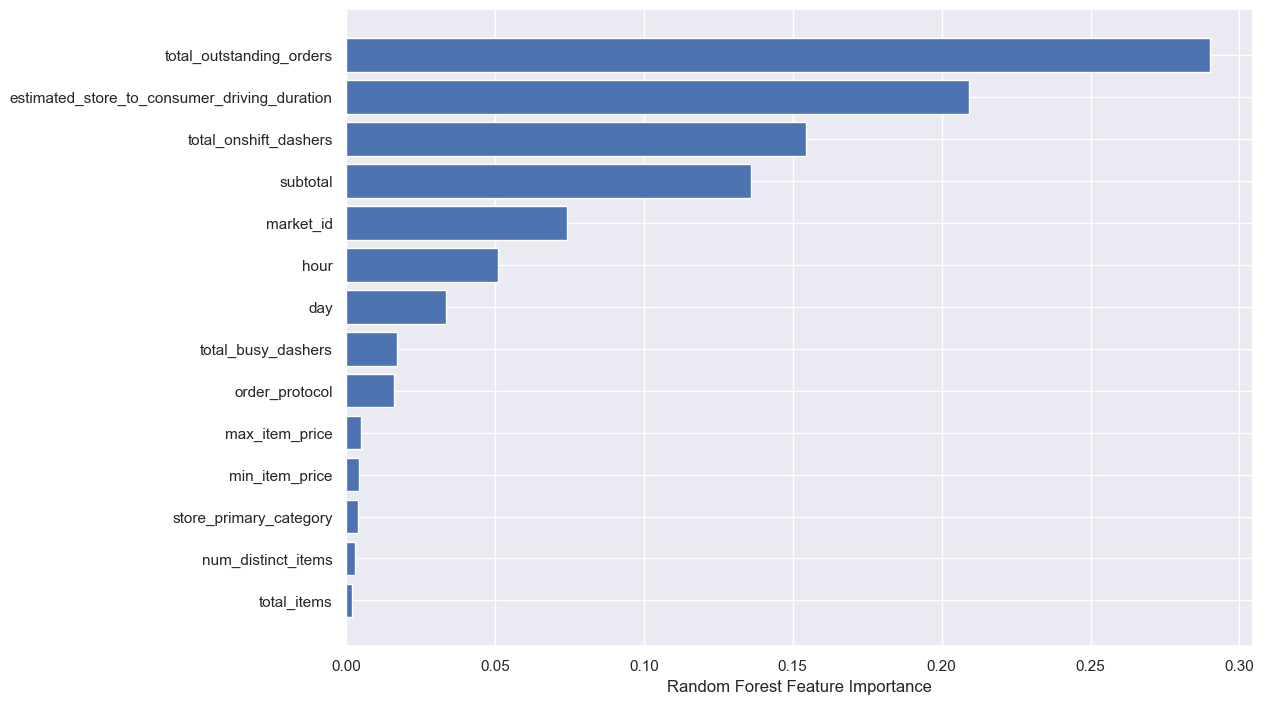

In [30]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## **Neural networks**

* Scaling the data to feed before neural network using minmaxscaler.

In [31]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

* We will build a simple neural network to train our regression model it is a sequential model with three layers,

* We have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers 512,1024,256.

* The activation for the layers is kept as relu because it is a great non-linear activation function that works for most cases, we could have used leaky relu if we see the gradient vanishing.

* The last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [32]:
model = Sequential()
model.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))


* we use adam optimizer which is extention to classic schostic gradient descent(SGD) algorithm, but handles much of its drawbacks

* Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

In [33]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 198.0673 - mae: 8.6049 - mse: 198.0673 - val_loss: 3.5534 - val_mae: 1.3776 - val_mse: 3.5534
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 3.5176 - mae: 1.4087 - mse: 3.5176 - val_loss: 14.9473 - val_mae: 3.6808 - val_mse: 14.9473
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.4372 - mae: 1.4131 - mse: 3.4372 - val_loss: 0.9384 - val_mae: 0.7748 - val_mse: 0.9384
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.4330 - mae: 0.9650 - mse: 1.4330 - val_loss: 2.0826 - val_mae: 1.3374 - val_mse: 2.0826
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.3904 - mae: 1.1969 - mse: 2.3904 - val_loss: 2.1910 - val_mae: 1.3896 - val_mse: 2.1910
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 1.2912 - mae: 0.9418 - mse: 1.2912 - val_loss: 2.8954 - val_mae: 1.6009 - val_mse: 2.8954
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1.0710 - mae: 0.8192 - mse:

we plot train and validation loss throughout training

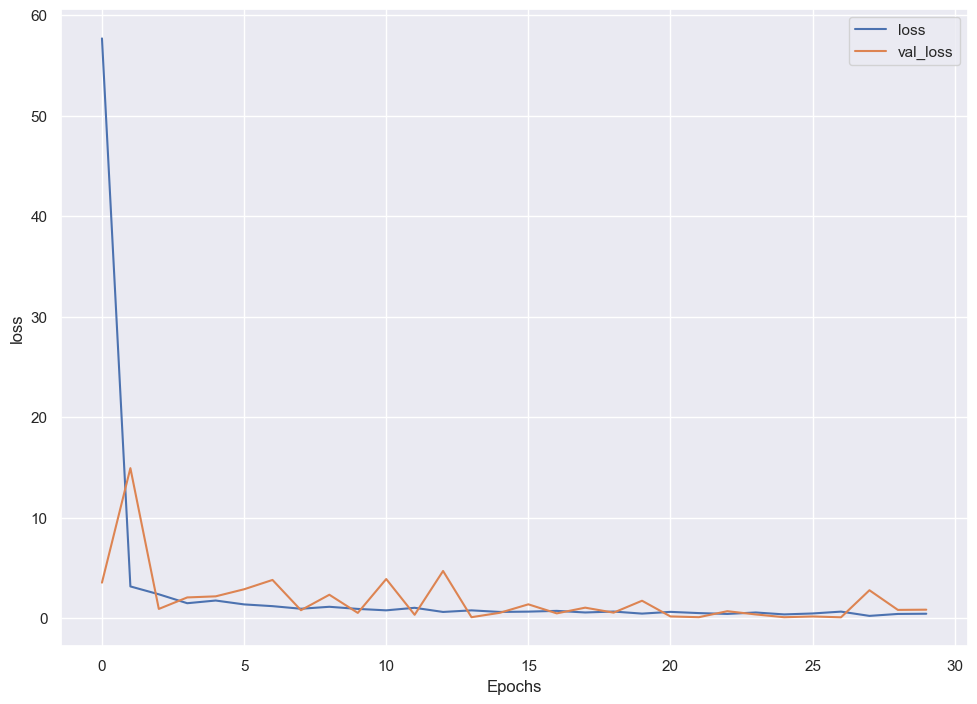

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

val loss is below training loss so our model is not overfitting

In [35]:
z= model.predict(X_test)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [36]:
r2_score(y_test, z)

0.9900957452363808

In [37]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)


mse :  0.8521660049330951
rmse :  0.9231283794430194
errors for neural net
mae :  0.8593376918464567


In [38]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, z)

0.019302708434070566

By comparing the results of our neural network model with the random forest model we can see that without any tuning or creating pretty complex architectures for training our model we have achieved high accuracy